In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten, Dense,Dropout, Softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing import image
from glob import glob

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
Image_size=[224,224]
train_path="/content/drive/MyDrive/braintumordataset/Training"
test_path="/content/drive/MyDrive/braintumordataset/Testing"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/braintumordataset/Training',
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

Found 2870 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

testing_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/braintumordataset/Testing',
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

Found 394 images belonging to 4 classes.


In [ ]:
# resnet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn = Sequential()
cnn.add(base_model)
# Add BatchNormalization after each convolutional block within the base model (optional)
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):  # Check if it's a convolutional layer
        cnn.add(BatchNormalization())
cnn.add(GlobalAveragePooling2D())
cnn.add(Dense(units=256, activation='relu'))
cnn.add(BatchNormalization())  # Batch normalization layer
cnn.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
cnn.add(Dense(units=4, activation='softmax'))

In [ ]:
for layer in base_model.layers[:-8]:
    layer.trainable = True

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = cnn.fit(x=training_set, batch_size=32, validation_data=testing_set, epochs=20)

Epoch 1/20
180/180 [==============================] - 913s 5s/step - loss: 0.7579 - accuracy: 0.7620 - val_loss: 3.1916 - val_accuracy: 0.2437
Epoch 2/20
180/180 [==============================] - 73s 407ms/step - loss: 0.3302 - accuracy: 0.8843 - val_loss: 3.0247 - val_accuracy: 0.3579
Epoch 3/20
180/180 [==============================] - 73s 405ms/step - loss: 0.2451 - accuracy: 0.9237 - val_loss: 5.5797 - val_accuracy: 0.3503
Epoch 4/20
180/180 [==============================] - 71s 392ms/step - loss: 0.2202 - accuracy: 0.9240 - val_loss: 3.0323 - val_accuracy: 0.3629
Epoch 5/20
180/180 [==============================] - 73s 408ms/step - loss: 0.1976 - accuracy: 0.9387 - val_loss: 2.0828 - val_accuracy: 0.5914
Epoch 6/20
180/180 [==============================] - 71s 392ms/step - loss: 0.1354 - accuracy: 0.9564 - val_loss: 1.8052 - val_accuracy: 0.6371
Epoch 7/20
180/180 [==============================] - 72s 400ms/step - loss: 0.0994 - accuracy: 0.9679 - val_loss: 1.5508 - val_accu

In [ ]:
accuracy = cnn.evaluate(testing_set)[1]
print("Test Accuracy:", accuracy)

25/25 [==============================] - 7s 275ms/step - loss: 2.5912 - accuracy: 0.7766
Test Accuracy: 0.7766497731208801


In [ ]:
loss = cnn.evaluate(testing_set)[1]
print("Test loss:", loss)

25/25 [==============================] - 13s 472ms/step - loss: 2.6420 - accuracy: 0.7766
Test loss: 0.7766497731208801


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 2048)        8192      
 chNormalization)                                                
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 2048)        8192      
 chNormalization)                                                
                                                                 
 batch_normalization_3 (Bat  (None, 7, 7, 2048)        8192      
 chNormalization)                                     

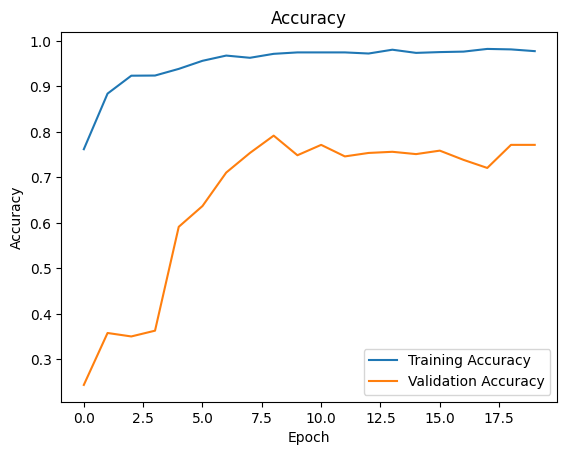

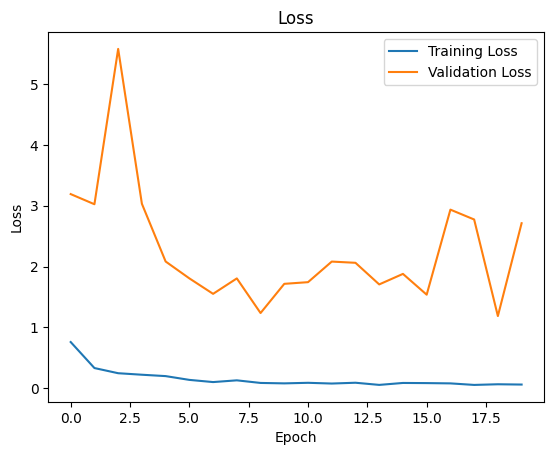

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
